<a href="https://colab.research.google.com/github/osohyun0224/Introduction-to-BigData/blob/master/bigd_06_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B8%B0_20205205_%EC%98%A4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1번문제

In [2]:
install.packages(c("tidyverse","data.table","caret","e1071", "Hmisc"))
library(tidyverse)
library(data.table)
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
#https://drive.google.com/file/d/1jiS08cId0B2VbILeku_YZqSrVhvc2bEM/view?usp=share_link

system("gdown --id 1jiS08cId0B2VbILeku_YZqSrVhvc2bEM")
system("ls", TRUE)


[1] "sample_data"       "titanic_train.csv"

# 2번문제

In [4]:
DF <- fread("/content/titanic_train.csv", header =T, encoding ="UTF-8") %>% as_tibble
DF %>% show()

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

In [5]:
DF %>% str()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [6]:
#범주형 변수 확인
DF$Survived %>% unique() #Survived : 생존=1, 죽음=0
DF$Pclass %>% unique() #Pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
DF$Sex %>% unique() #Sex : "male" "female"
DF$Ticket %>% unique() #Ticket : 티켓 번호
DF$Embarked %>% unique() #탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


[1] "S" "C" "Q" ""

In [8]:
# 범주형 변수들을 범주형으로 변환
DF <- select(DF, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

In [9]:
DF %>% str()
DF %>% show()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0 

# 4번

In [10]:
DF %>% summary()

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked
 Min.   :  0.00    :  2   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:644   
 3rd Qu.: 31.00           
 Max.   :512.33           
                          

In [11]:
install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [12]:
DF$Age <- impute(DF$Age,median)
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 881 more rows


# 5번 문제


In [13]:
install.packages("gmodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’




In [16]:
#Survived(생존여부)와 Pclass(승객등급)의 연관 관계
print("Survived(생존여부)와 Pclass(승객등급)의 연관 관계")
gmodels::CrossTable(DF$Survived, DF$Pclass, chisq=T, expected = T, prop.r =F, prop.c=F)

[1] "Survived(생존여부)와 Pclass(승객등급)의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  891 

 
             | DF$Pclass 
 DF$Survived |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           0 |        80 |        97 |       372 |       549 | 
             |   133.091 |   113.374 |   302.535 |           | 
             |    21.178 |     2.365 |    15.950 |           | 
             |     0.090 |     0.109 |     0.418 |           | 
-------------|-----------|-----------|-----------|-----------|
           1 |       136 |        87 |       119 |       342 | 
             |    82.909 |    70.626 |   188.465 |           | 
             |    33.997 |     3.796 |    25.603 |           | 
             |     0.153 |     0.098 |     0.134 |           | 
-

In [17]:
#Survived(생존여부)와 Sex(성별)의 연관 관계 조사
print("Survived(생존여부)와 Sex(성별)의 연관 관계")
gmodels::CrossTable(DF$Survived, DF$Sex, chisq=T, expected = T, prop.r =F, prop.c=F)

[1] "Survived(생존여부)와 Sex(성별)의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  891 

 
             | DF$Sex 
 DF$Survived |    female |      male | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        81 |       468 |       549 | 
             |   193.475 |   355.525 |           | 
             |    65.386 |    35.583 |           | 
             |     0.091 |     0.525 |           | 
-------------|-----------|-----------|-----------|
           1 |       233 |       109 |       342 | 
             |   120.525 |   221.475 |           | 
             |   104.962 |    57.120 |           | 
             |     0.262 |     0.122 |           | 
-------------|-----------|-----------|-----------|
Column Total |       314 |       577 |       891 | 
-------------|-----------|-----------|

#6번문제


In [18]:
#학습 데이터 분할
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
index <- caret::createDataPartition(y= DF$Survived, p=0.9, list=FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1        1      female 38           1     0 71.3  C       
 2 1        3      female 26           0     0  7.92 S       
 3 1        1      female 35           1     0 53.1  S       
 4 0        3      male   35           0     0  8.05 S       
 5 0        3      male   28           0     0  8.46 Q       
 6 0        1      male   54           0     0 51.9  S       
 7 0        3      male    2           3     1 21.1  S       
 8 1        3      female 27           0     2 11.1  S       
 9 1        3      female  4           1     1 16.7  S       
10 1        1      female 58           0     0 26.6  S       
# ℹ 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        2

# 7번문제


In [22]:
print("glm model m")
m <- glm(Survived ~ ., data =train, family = "binomial")
summary(m)

[1] "glm model m"



Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.285751 611.026698   0.027  0.97874    
Pclass2      -0.803298   0.312246  -2.573  0.01009 *  
Pclass3      -1.945858   0.305338  -6.373 1.86e-10 ***
Sexmale      -2.631714   0.208168 -12.642  < 2e-16 ***
Age          -0.038092   0.008096  -4.705 2.54e-06 ***
SibSp        -0.327947   0.115133  -2.848  0.00439 ** 
Parch        -0.097939   0.125054  -0.783  0.43352    
Fare          0.003041   0.002624   1.159  0.24652    
EmbarkedC   -12.422728 611.026579  -0.020  0.98378    
EmbarkedQ   -12.606776 611.026638  -0.021  0.98354    
EmbarkedS   -12.809850 611.026566  -0.021  0.98327    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual deviance:  719.99  on 792  degrees of freedom
AIC: 741.99

Number

# 8번문제

In [23]:
print("backward model mback")
mback <- step(m, direction = "backward")

[1] "backward model mback"
Start:  AIC=741.99
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   723.05 739.05
- Parch     1   720.61 740.61
- Fare      1   721.50 741.50
<none>          719.99 741.99
- SibSp     1   729.70 749.70
- Age       1   743.95 763.95
- Pclass    2   766.85 784.85
- Sex       1   917.18 937.18

Step:  AIC=739.05
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Parch   1   723.79 737.79
<none>        723.05 739.05
- Fare    1   725.28 739.28
- SibSp   1   734.16 748.16
- Age     1   747.71 761.71
- Pclass  2   772.48 784.48
- Sex     1   930.77 944.77

Step:  AIC=737.79
Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance    AIC
- Fare    1   725.57 737.57
<none>        723.79 737.79
- SibSp   1   738.05 750.05
- Age     1   748.19 760.19
- Pclass  2   776.11 786.11
- Sex     1   933.86 945.86

Step:  AIC=737.57
Survived ~ Pclass + Sex + Age + SibSp

   

In [24]:
summary(mback)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.870991   0.404455   9.571  < 2e-16 ***
Pclass2     -1.097771   0.273109  -4.020 5.83e-05 ***
Pclass3     -2.218214   0.248409  -8.930  < 2e-16 ***
Sexmale     -2.648826   0.200493 -13.212  < 2e-16 ***
Age         -0.038845   0.008011  -4.849 1.24e-06 ***
SibSp       -0.349100   0.108738  -3.210  0.00133 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual deviance:  725.57  on 797  degrees of freedom
AIC: 737.57

Number of Fisher Scoring iterations: 5


# 9번문제

In [25]:
# mback 모델을 사용하여 test 데이터로 예측
predict_value <- predict(mback, test, type="response") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 88 × 1
   predict_value
           <dbl>
 1        0.0998
 2        0.868 
 3        0.534 
 4        0.111 
 5        0.638 
 6        0.140 
 7        0.563 
 8        0.438 
 9        0.798 
10        0.140 
# ℹ 78 more rows


# 10번문제

In [26]:
predict_check <- test %>% select(Survived)  %>% dplyr::bind_cols(.,predict_value )
predict_check %>% show()

# A tibble: 88 × 2
   Survived predict_value
   <fct>            <dbl>
 1 0               0.0998
 2 1               0.868 
 3 1               0.534 
 4 0               0.111 
 5 1               0.638 
 6 0               0.140 
 7 0               0.563 
 8 0               0.438 
 9 0               0.798 
10 0               0.140 
# ℹ 78 more rows


#11번문제

In [28]:
predict_cutoff_5 <- predict_check %>% mutate(predict_Survived = as.factor(ifelse(predict_value > 0.5, 1, 0)))
predict_cutoff_5 %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_Survived
   <fct>            <dbl> <fct>           
 1 0               0.0998 0               
 2 1               0.868  1               
 3 1               0.534  1               
 4 0               0.111  0               
 5 1               0.638  1               
 6 0               0.140  0               
 7 0               0.563  1               
 8 0               0.438  0               
 9 0               0.798  1               
10 0               0.140  0               
# ℹ 78 more rows


#12번문제

In [29]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Setting levels: control = 0, case = 1

Setting direction: controls < cases



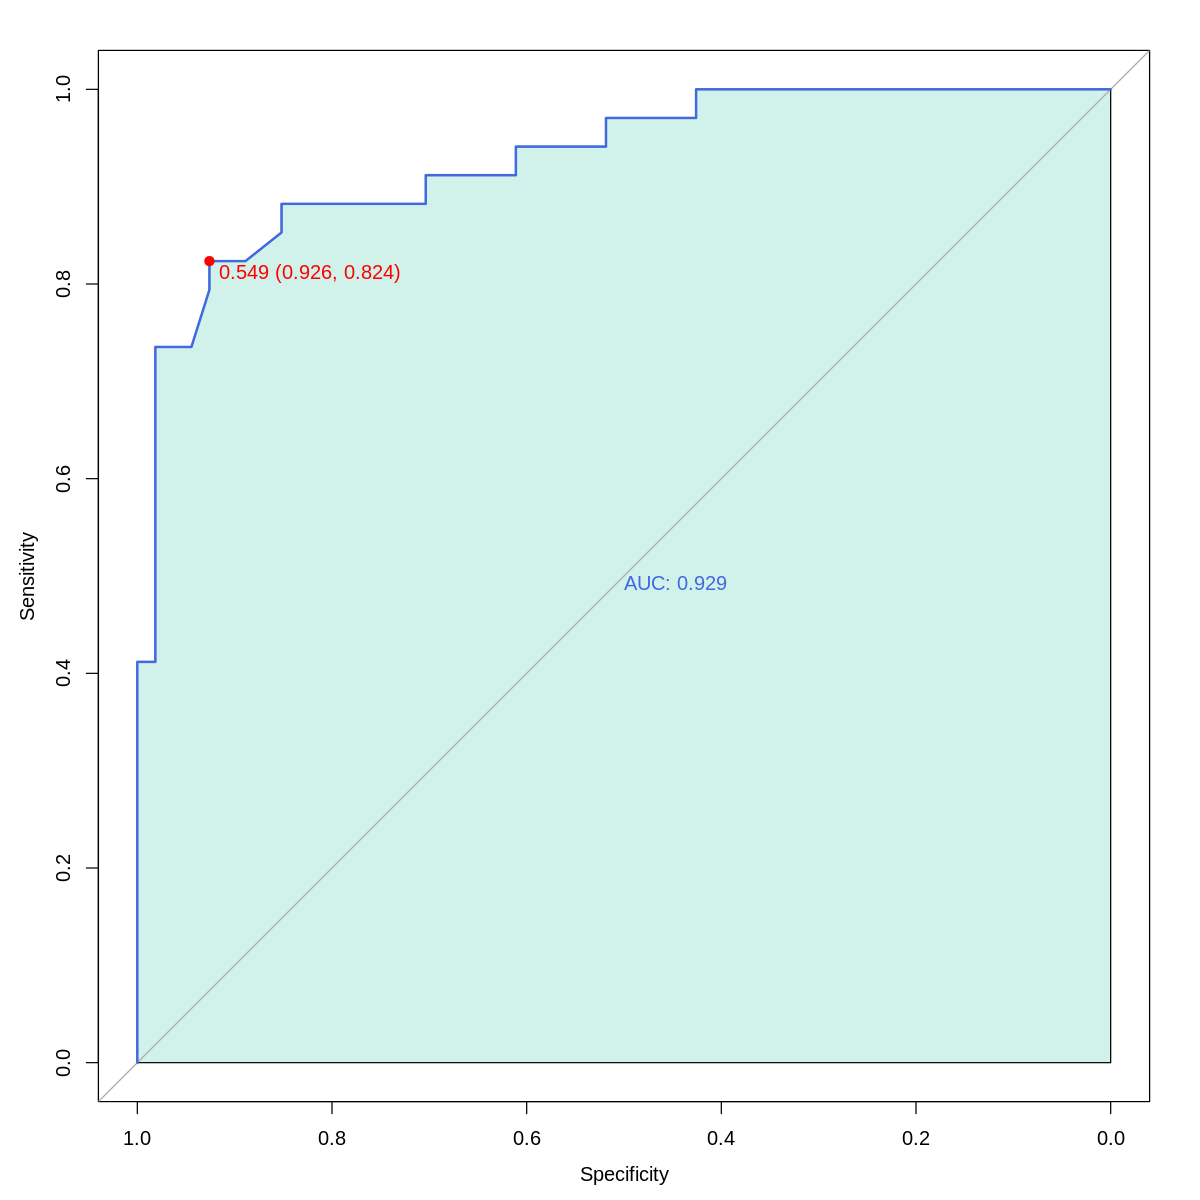

In [31]:
roc_c <- pROC::roc(predict_check$Survived, predict_check$predict_value)
pROC::plot.roc(roc_c,
        col="royalblue",
        print.auc=TRUE,
        max.auc.polygen=TRUE,
        print.thres=TRUE, print.thres.pch=19, print.thres.col="red",
        auc.polygon=TRUE, auc.polygon.col="#D1F2EB")

#13번문제

In [32]:
pROC::coords(roc_c, "best", ret ="threshold", transponse=F)

threshold
<dbl>
0.548701


In [33]:
#ROC 곡선의 결과로 cut off 재설정
predict_cutoff_roc <- predict_check %>% mutate(predict_Survived = as.factor(ifelse(predict_value > 0.2600063, 1, 0)))
predict_cutoff_roc %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_Survived
   <fct>            <dbl> <fct>           
 1 0               0.0998 0               
 2 1               0.868  1               
 3 1               0.534  1               
 4 0               0.111  0               
 5 1               0.638  1               
 6 0               0.140  0               
 7 0               0.563  1               
 8 0               0.438  1               
 9 0               0.798  1               
10 0               0.140  0               
# ℹ 78 more rows


In [34]:
#ROC 곡선의 결과로 cut off 재설정
predict_cutoff_roc <- predict_check %>% mutate(predict_Survived = as.factor(ifelse(predict_value > 0.4894081, 1, 0)))
predict_cutoff_roc %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_Survived
   <fct>            <dbl> <fct>           
 1 0               0.0998 0               
 2 1               0.868  1               
 3 1               0.534  1               
 4 0               0.111  0               
 5 1               0.638  1               
 6 0               0.140  0               
 7 0               0.563  1               
 8 0               0.438  0               
 9 0               0.798  1               
10 0               0.140  0               
# ℹ 78 more rows


#15번문제


In [38]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
caret::confusionMatrix(predict_cutoff_roc$Survived, predict_cutoff_roc$predict_Survived)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 44 10
         1  4 30
                                          
               Accuracy : 0.8409          
                 95% CI : (0.7475, 0.9102)
    No Information Rate : 0.5455          
    P-Value [Acc > NIR] : 4.384e-09       
                                          
                  Kappa : 0.6751          
                                          
 Mcnemar's Test P-Value : 0.1814          
                                          
            Sensitivity : 0.9167          
            Specificity : 0.7500          
         Pos Pred Value : 0.8148          
         Neg Pred Value : 0.8824          
             Prevalence : 0.5455          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : 0               
                                    